# KMEANS
first we import some necessary libraries:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


lets load the image and convert it to RGB format:

In [2]:
image = cv2.imread("C:\\Users\\Ali\\Desktop\\3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
len(image)

256

so our picture has 65536 pixels and each pixel  has 3 values as RGB values:

# PCA
We gonna use cv2.kmeans() function which takes a 2D array as input, and since our original image is 3D (width, height and depth of 3 RGB values), we need to flatten the height and width into a single vector of pixels (3 RGB values):

In [4]:
pixel_values = image.reshape((-1, 3))
# convert to float
# print(pixel_values)
pixel_values = np.float32(pixel_values)

since this is a large number of data points so it'll take a lot of time to process, we are going to stop either when some number of iterations exceeded (say 100) or if the clusters move less than some epsilon value (let's pick 0.2 here), the below code define this stopping criteria in OpenCV:

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

so as we saw the processed picture lets do Kmeans with 9 clusters for test:

In [6]:
k=9

# Here: when you want test with different k

In [7]:


ret, labels, (centers) = cv2.kmeans(pixel_values, k+1, None, criteria,100, cv2.KMEANS_RANDOM_CENTERS)


k=k+1
# sse = []
# list_k = list(range(1, 10))

# for k in list_k:
#     ret, labels, (centers) = cv2.kmeans(pixel_values, k+1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#     sse.append(ret)

# Plot sse against k
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Number of clusters *k*')
# plt.ylabel('Sum of squared distance');

If you look back at the code, we didn't mention that we converted the flattened image pixel values to floats, we did that because cv2.kmeans() expects that, let's convert them back to 8-bit pixel values:

In [8]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
labels

array([2, 2, 2, ..., 2, 6, 2], dtype=int32)

here lets try to find the RGB values of processed image and find the clusters in our recently processed picture.

In [9]:
segmented_image = centers[labels.flatten()]
len(segmented_image)
array=[]
for i in range(65536):
    s=segmented_image[i].tolist()
    flag =0
    for j in range(len(array)):
        if array[j] == s:
            flag =1
    if flag ==0:
        array.append(s)


len(array)
        

10

here are the RGB color values:)

In [10]:
array=[]
for i in range(k):
    j=0
    while(labels[j]!=i):
        j=j+1
    array.append(segmented_image[j].tolist())
        
array    

[[202, 25, 69],
 [3, 59, 99],
 [5, 3, 5],
 [73, 129, 176],
 [125, 62, 127],
 [225, 45, 209],
 [72, 70, 65],
 [106, 140, 36],
 [128, 139, 101],
 [2, 1, 136]]

In [11]:
print(labels[359])
# import random
# random.shuffle(array)
# array=[[67, 47, 127], [3, 59, 99], [202, 25, 69],[5, 3, 5] , [126, 64, 126], [225, 45, 209], [108, 140, 37], [72, 70, 65], [73, 129, 176], [2, 1, 136]]

4


# coloring your result to k_color

In [12]:
# arr=[[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[255,255,255],[0,0,0],[168, 78, 178],[95, 205, 95]]
# labels

for i in range(65536):
    segmented_image[i]=array[labels[i]]


to know if we did it right lets shoe the images and check it visually.

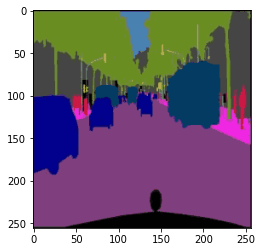

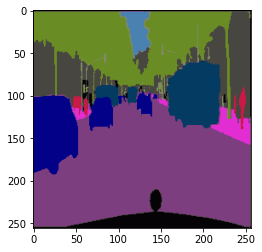

[[202, 25, 69], [3, 59, 99], [5, 3, 5], [73, 129, 176], [125, 62, 127], [225, 45, 209], [72, 70, 65], [106, 140, 36], [128, 139, 101], [2, 1, 136]]


In [13]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(image)
plt.show()
plt.imshow(segmented_image)
plt.show()
print(array)

now lets load and process our un processed image like our processed one.

In [14]:
image2 = cv2.imread("C:\\Users\\Ali\\Desktop\\8.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


In [15]:
pixel_values2 = image2.reshape((-1, 3))
# convert to float
# print(pixel_values)
pixel_values2 = np.float32(pixel_values2)

In [16]:
print(pixel_values2.shape)

(65536, 3)


In [17]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [18]:
k=k-1

In [19]:

ret2, labels2, (centers2) = cv2.kmeans(pixel_values2, k+1, None, criteria,100, cv2.KMEANS_RANDOM_CENTERS)
k=k+1

In [20]:
centers2 = np.uint8(centers2)

# flatten the labels array
labels2 = labels2.flatten()


In [21]:
segmented_image2 = centers2[labels2.flatten()]
print(segmented_image2)

[[43 53 40]
 [30 38 29]
 [30 38 29]
 ...
 [43 53 40]
 [43 53 40]
 [43 53 40]]


because KMEANS returns a processed pictur that mostly gray we masked the processed image so we can see the different clusters easily.

In [22]:
arr=[[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[255,255,255],[0,0,0],[168, 78, 178],[95, 205, 95]]
labels2
for i in range(65535):
    segmented_image2[i]=arr[labels2[i]]


the accuracy function detects the places of each pixel that blongs to each cluster  then it compares 2 pictures labels and finds which cluster in our image reffers to which cluster in our imageplus.
image= un processed image
imageplus= processed image(gave by some deep learning algorithem)
out picture has 65536 pixels

In [23]:
def accuracy(labels,labels_comp):
    result_comp=[]
    result=[]
    a=0
    for i in range(9):
        boolarr_comp=(labels_comp==i)
        test=np.where(boolarr_comp)
        result_comp.append(test)
    print(len(result_comp))
    for i in range(9):
        boolarr=(labels==i)
        test=np.where(boolarr)
        result.append(test)
    print(len(result))
    for i in range(9):
        max=0.0
#         clus=[]
        for j in range(9):
            num=np.intersect1d(result_comp[i],result[j]).size
            if(max<num):
                max=num
                x=j
        a=a+np.intersect1d(result_comp[i],result[x]).size
#         clus.extend([np.intersect1d(result_comp[i],result[x]).size])
#         print(a)
#     return np.sum(clus)/65536
    return a/65536

by comparing our recently processed image and our preprocessed image we can get the accuracy of our algorithm.

In [24]:
eeee=accuracy(labels2,labels)
eeee

9
9


0.3161773681640625

here is our unprocessed image and after processing it.

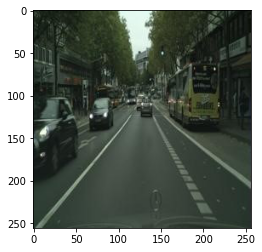

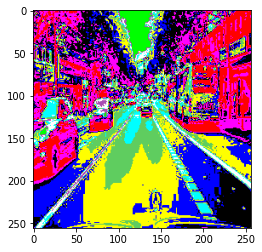

In [25]:
# reshape back to the original image dimension
segmented_image3 = segmented_image2.reshape(image2.shape)
# show the image
plt.imshow(image2)
plt.show()
plt.imshow(segmented_image3)
plt.show()

# List of number of each cluster in ground truth image

In [26]:
sort=[]
acc_all=[]
arr_all=[]
for j in range(k):
    acc=[0,0,0,0,0,0,0,0,0,0,0]
    arr=[0,0,0,0,0,0,0,0,0,0,0]
    for i in range(65536):
        if labels[i] == j:
            arr[labels2[i]]=arr[labels2[i]]+1
    print('array ',j,':',arr)        
    print(arr.index(max(arr)))
    arr_all.append(arr)
    s=0
    for i in range(k):
        s=s+arr[i]
    for i in range(k):
        acc[i]=100*arr[i]/s 
    acc_all.append(acc)
    print(acc)

array  0 : [275, 0, 13, 13, 5, 140, 0, 40, 0, 9, 0]
0
[55.55555555555556, 0.0, 2.6262626262626263, 2.6262626262626263, 1.0101010101010102, 28.282828282828284, 0.0, 8.080808080808081, 0.0, 1.8181818181818181, 0]
array  1 : [1097, 5, 733, 675, 186, 733, 62, 714, 31, 465, 0]
0
[23.33546054031057, 0.10636034886194427, 15.59242714316103, 14.358647096362477, 3.956604977664327, 15.59242714316103, 1.3188683258881089, 15.188257817485642, 0.6594341629440544, 9.891512444160817, 0]
array  2 : [148, 39, 772, 1559, 48, 193, 21, 373, 4, 341, 0]
3
[4.230989136649514, 1.1149228130360205, 22.069754145225843, 44.568324757004, 1.3722126929674099, 5.517438536306461, 0.6003430531732419, 10.663236134934248, 0.11435105774728416, 9.748427672955975, 0]
array  3 : [2, 1019, 0, 0, 0, 1, 0, 2, 4, 2, 0]
1
[0.1941747572815534, 98.93203883495146, 0.0, 0.0, 0.0, 0.0970873786407767, 0.0, 0.1941747572815534, 0.3883495145631068, 0.1941747572815534, 0]
array  4 : [730, 32, 6917, 8595, 1774, 334, 880, 2808, 237, 4270, 0]
3

In [27]:
print(arr_all)


    


[[275, 0, 13, 13, 5, 140, 0, 40, 0, 9, 0], [1097, 5, 733, 675, 186, 733, 62, 714, 31, 465, 0], [148, 39, 772, 1559, 48, 193, 21, 373, 4, 341, 0], [2, 1019, 0, 0, 0, 1, 0, 2, 4, 2, 0], [730, 32, 6917, 8595, 1774, 334, 880, 2808, 237, 4270, 0], [78, 0, 88, 61, 6, 599, 0, 372, 0, 26, 0], [3098, 8, 1041, 726, 232, 2118, 173, 1598, 42, 464, 0], [1320, 39, 1785, 825, 233, 3207, 133, 4344, 112, 444, 0], [135, 129, 57, 41, 17, 124, 4, 80, 51, 36, 0], [1269, 72, 286, 236, 538, 1559, 387, 523, 191, 328, 0]]


# change color to color near our ground truth

In [28]:
acc_all=arr_all
correct_label=[]
correct_flag=[0,0,0,0,0,0,0,0,0,0]
# for hf in range(k):
#     correct_flag.append(0)
correct_s=[1,1,1,1,1,1,1,1,1,1]
# for hf in range(k):
#     correct_s.append(1)
while correct_flag!=correct_s:
    for i in range(k):
        if correct_flag[i]==0:
            find_empty=i
            break
    ff=k-2
    while correct_flag[find_empty] ==0:
        
        
        v=(acc_all[find_empty]).copy()
        v.sort()
        e=v[ff]
#         print(v)
#         print('e=',e)
#         print(acc_all[find_empty])
        for t in range(k):
#             print(acc_all[t])
            if e ==acc_all[find_empty][t]:
                local_max=t
                break
#         print(local_max)
#         local_max=max(acc_all[find_empty])
        
        if local_max not in correct_label:
            correct_flag[find_empty]=1
            if len(correct_label)==find_empty:
                correct_label.append(local_max)
            else:
                correct_label[find_empty]=local_max
            
        else:
            
            for j in range(k):
                if local_max ==correct_label[j]:
                    xx=j
                    break
#             print('xx=',xx)
#             print('a=',acc_all[xx][local_max],'b=',acc_all[find_empty][local_max])    
            if acc_all[xx][local_max]>acc_all[find_empty][local_max] or acc_all[find_empty][local_max]==-1:
                
                ff=ff-1
                continue
            else:
                
                correct_flag[find_empty]=1
#                 correct_label[find_empty]=local_max
                if len(correct_label)==find_empty:
                    correct_label.append(local_max)
                else:
                    correct_label[find_empty]=local_max
                correct_flag[xx]=0
                correct_label[xx]=-1
#         print(correct_label)
                
print(correct_label)                
            
            
        

[0, 3, 6, 1, 9, 5, 7, 2, 8, 4]


In [29]:
print(labels2)
# array
print(acc_all)



[7 5 5 ... 7 7 7]
[[275, 0, 13, 13, 5, 140, 0, 40, 0, 9, 0], [1097, 5, 733, 675, 186, 733, 62, 714, 31, 465, 0], [148, 39, 772, 1559, 48, 193, 21, 373, 4, 341, 0], [2, 1019, 0, 0, 0, 1, 0, 2, 4, 2, 0], [730, 32, 6917, 8595, 1774, 334, 880, 2808, 237, 4270, 0], [78, 0, 88, 61, 6, 599, 0, 372, 0, 26, 0], [3098, 8, 1041, 726, 232, 2118, 173, 1598, 42, 464, 0], [1320, 39, 1785, 825, 233, 3207, 133, 4344, 112, 444, 0], [135, 129, 57, 41, 17, 124, 4, 80, 51, 36, 0], [1269, 72, 286, 236, 538, 1559, 387, 523, 191, 328, 0]]


In [30]:
array2=array.copy()
for i in range(k):
    array2[correct_label[i]]=array[i]

In [31]:
array2


[[202, 25, 69],
 [73, 129, 176],
 [106, 140, 36],
 [3, 59, 99],
 [2, 1, 136],
 [225, 45, 209],
 [5, 3, 5],
 [72, 70, 65],
 [128, 139, 101],
 [125, 62, 127]]

In [32]:
for i in range(65535):
#     print(i,':',labels2[i])
    segmented_image2[i]=array2[labels2[i]]


now lets see if it works :
yeees it works :D

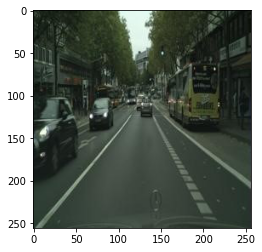

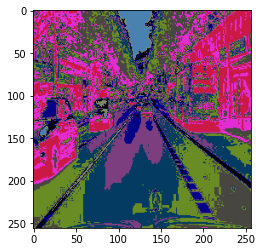

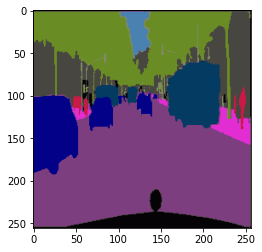

In [33]:
segmented_image2 = segmented_image2.reshape(image2.shape)
# show the image
plt.imshow(image2)
plt.show()
plt.imshow(segmented_image2)
plt.show()
plt.imshow(segmented_image)
plt.show()

here is our Elbow char:
we defined a class that runs the k means algorithem for different K ranged between 1 and 50:

In [34]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)



In [35]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


after sawing the chart of elbow and detecting the elbow parameter we get the right K for our algorithim  but we have to see the elbow and detect it visually.

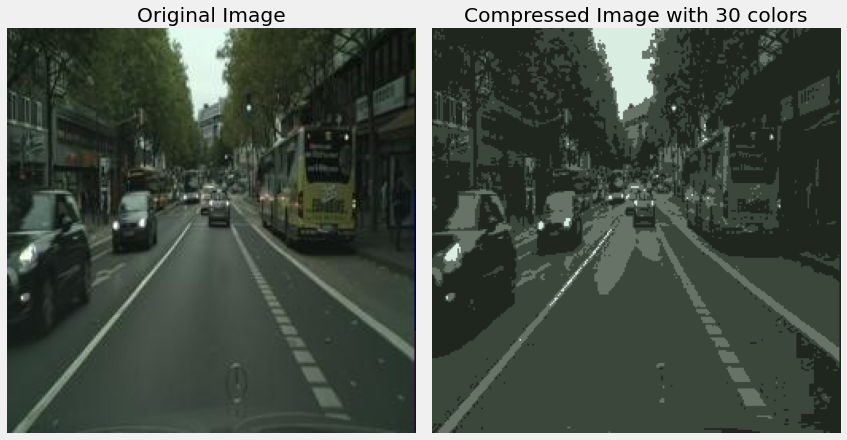

In [36]:

img = imread("C:\\Users\\Ali\\Desktop\\1.jpg")
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run the Kmeans algorithm
km = KMeans(n_clusters=4)
km.fit(X)

# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

here is our loop for diffrent K and drawing the chart of our elbow algorithm.

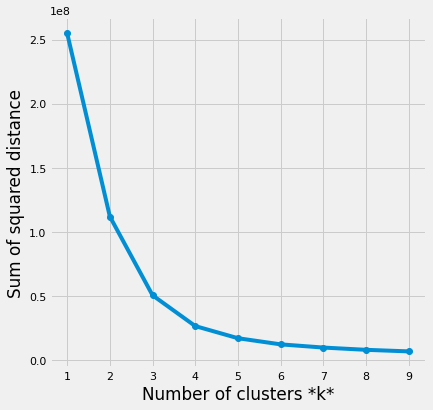

In [37]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# best k that elbow say to us is 3 or 4

In [38]:
k=3

# for test by 3 run from Here in up